# Сеть фитнес-центров "Культурист-датасаентист". Отток клиентов

## Содержание

1. [Описание проекта](#1)
2. [Задача](#2)
3. [Предобработка данных](#3)
4. [Исследовательский анализ данных](#4)
5. [Модель прогнозирования оттока пользователей](#5)
6. [Кластеризация пользователей](#6)
7. [Выводы](#7)

## Описание проекта: <a id ='1'></a>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

## Задача<a id ='2'></a>

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: 
- выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- 1) выделить целевые группы клиентов;
- 2) предложить меры по снижению оттока;
- 3) определить другие особенности взаимодействия с клиентами.

## Предобработка данных<a id ='3'></a>

In [1]:
#загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
#чтение файла
df = pd.read_csv()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Описание данных

- 'Churn' — факт оттока в текущем месяце;
Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

In [4]:
#названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
#сумма дубликатов
df.duplicated().sum()

0

## Исследовательский анализ данных (EDA)<a id ='4'></a>

In [6]:
#распределение данных
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Мужчин и женщин поровну
- более 80% живут или работают в районе, где находится фитнес-центр
- 50% получили абонемент как сотрудник клуба
- 30% привели друзья
- 90% оставили  номер телефона
- среднее значение месяца посещения - 5
- 41% посещает групповые занятия
- средний возраст - 29 лет, минимальный -18, максимальные 41. 
- Время с момента первого посщения, суммы дополнительных затрат, текущий месяц посещения, количество посещений в неделю - стандартные отклонения высокие. 
- Факт оттока - 26%

In [7]:
#группировка по оттоку.средние значения
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- В среднем равное количество мужчин и женщин ушли из центра.

-  Из тех, кто остался в среднем: 
1. 87% живут или работают в том же районе
2. 53% пришли от компании партнера
3. 35% привели друзья
4. 90% оставили номер телефона
5. 5 месяцев - длительность абонемента
6. 46% посещают групповые занятия
7. возраст 30 лет 
8. выручка от услуг - 158 
9. еще 5 месяцев до окончания абонемента
10. менее 5 месяцев - время обращения 
11. 2 раза в неделю посещают центр


- Из тех, кто ушел в текущем месяце:
1. 76% живут или работают в том же районе
2. 35% пришли от компании партнера
3. 18% привели друзья
4. 90% оставили номер телефона
5. чуть больше 1 месяц - длительность абонемента
6. 26% посещают групповые занятия
7. возраст 27 лет 
8. выручка от услуг - 115 
9. еще 1 месяц до окончания абонемента
10. менее 1 месяца - время обращения 
11. 1 раза в неделю посещают центр

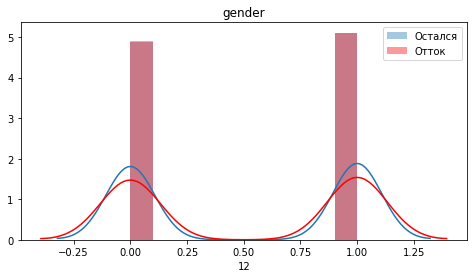

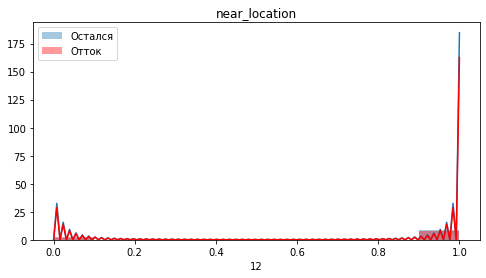

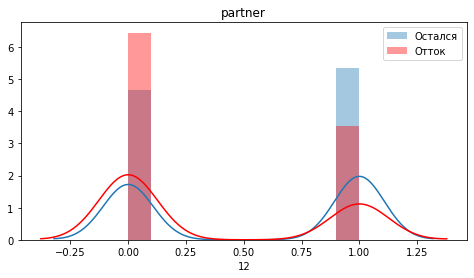

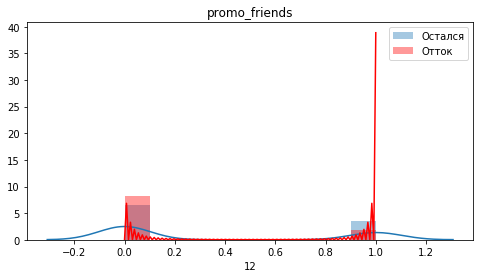

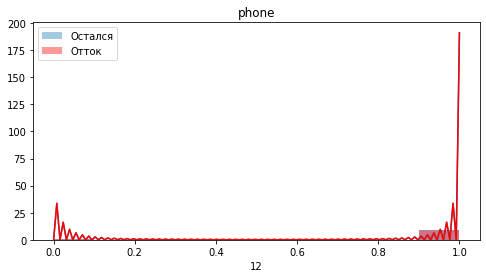

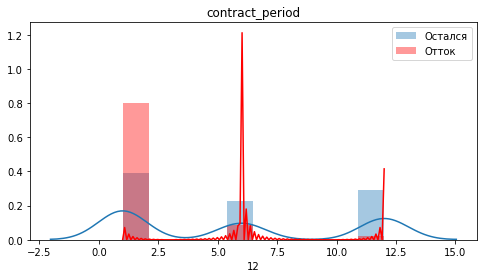

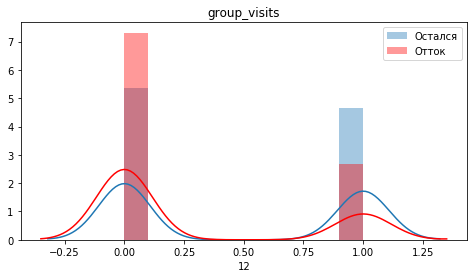

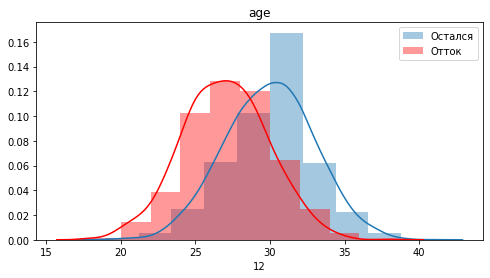

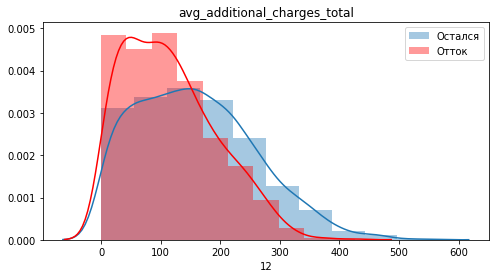

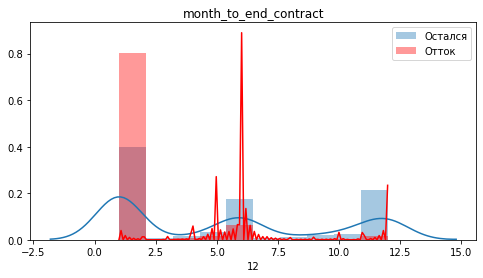

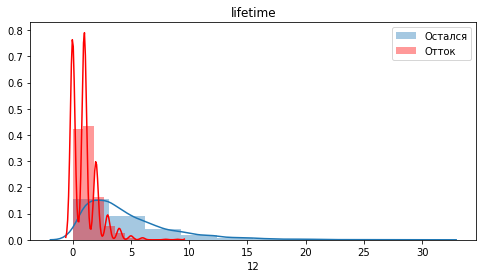

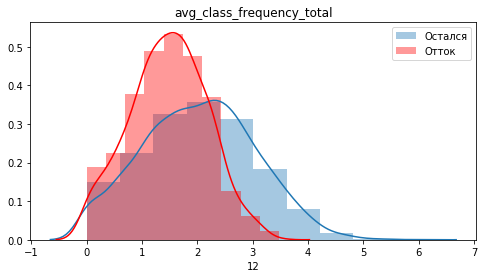

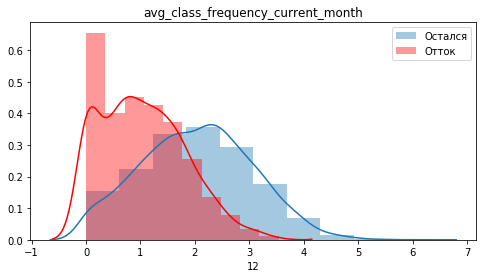

In [8]:
for i in df.drop(columns = ['churn']).columns:
    plt.figure(figsize=(8,4))
    sns.distplot(df.query('churn == 0')[i], label = 'Остался', axlabel = 12, bins=10)
    sns.distplot(df.query('churn == 1')[i], label = 'Отток', axlabel = 12, color="r", bins=10)
    plt.title(i)
    plt.legend()
    plt.show()

По распределениям: из тех, кто ушел, 65% не принимали участие в  программе "партнер", 82% пришли не по рекомендации друзей, брали абонемент на месяц, реже посещают групповые занятия, средний возраст 27, реже посещают фитнес-центр, в среднем 1 раз в неделю, в текущем месяце есть есть резкий выброс - не посещали центр. 

Text(0.5, 1, 'Матрица корреляций признаков')

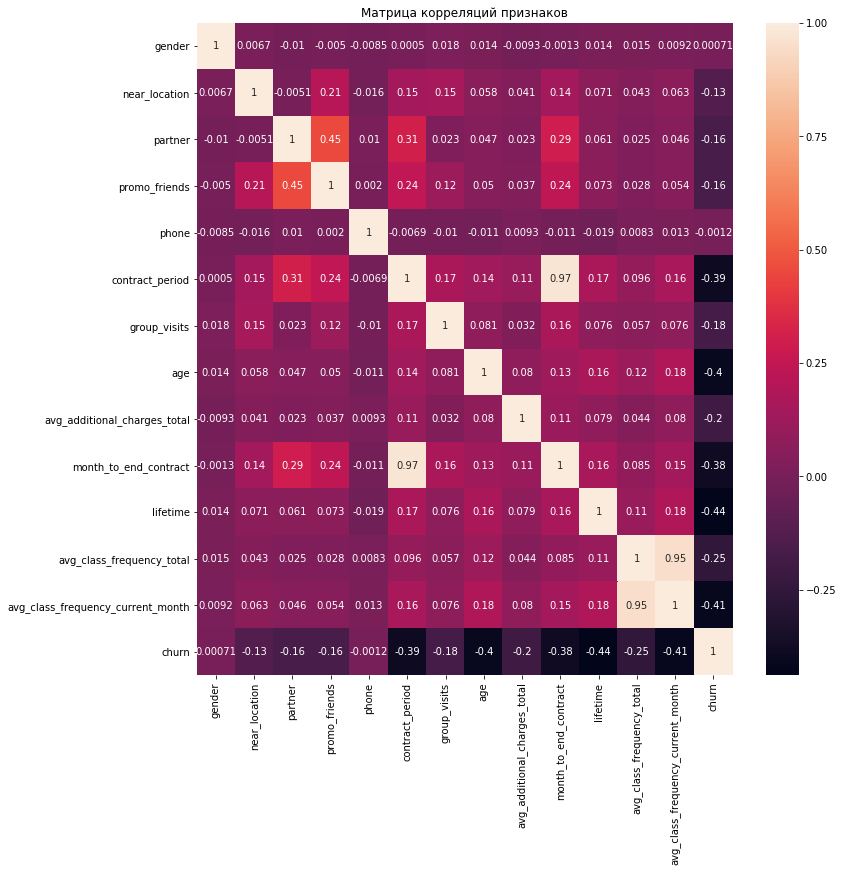

In [9]:
#матрица корреляций
#визуализация
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)
plt.title('Матрица корреляций признаков')

Сильно коррелирущие признаки: длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента,средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц 

Text(0, 0.5, 'Длительность текущего действующего абонемента')

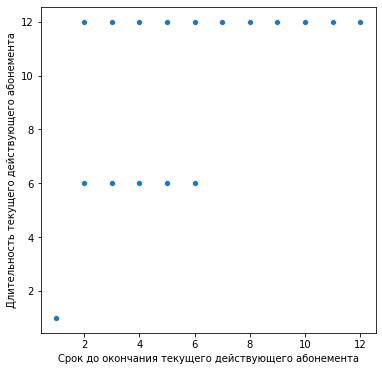

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['month_to_end_contract'], df['contract_period'])
plt.xlabel('Срок до окончания текущего действующего абонемента')
plt.ylabel('Длительность текущего действующего абонемента')

Text(0.5, 0, 'средняя частота посещений в неделю за предыдущий месяц')

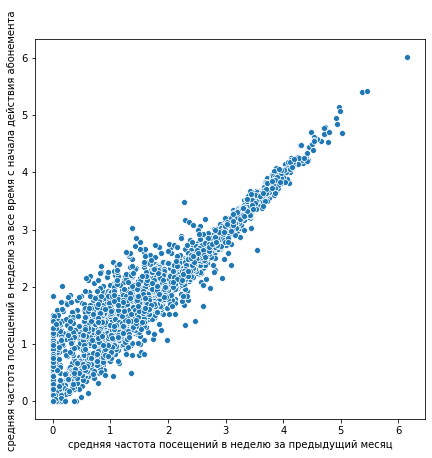

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(df['avg_class_frequency_current_month'], df['avg_class_frequency_total'])
plt.ylabel('средняя частота посещений в неделю за все время с начала действия абонемента ')
plt.xlabel('средняя частота посещений в неделю за предыдущий месяц')

## Модель прогнозирования оттока пользователей<a id ='5'></a>

In [12]:
#разделяем признаки на матрицу  X и целевую переменную y
X = df.drop(columns = ['churn'])
y = df['churn']

In [13]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [14]:
#алгоритм обучения логистической регрессии
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
#алгоритм обучения случайный лес
rf_model = RandomForestRegressor(random_state = 0, n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test).round()

In [16]:
#функция вывода метрик
def print_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
print_metrics(y_test, y_pred, title='Метрики для модели логистической регрессии:')  


Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [17]:
print_metrics(y_test,y_pred_rf , title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.93
	Precision: 0.87
	Recall: 0.86


Самая лучшая модель для прогнозирования оттока пользователей на следующий месяц. Модель случайного леса. Доля правильных ответов Accurancy 93%, точность 87%, полнота 86%.  

## Кластеризация пользователей<a id ='6'></a>

In [18]:
# стандартизируем данные
df_sc = df.drop(columns = ['churn']) 
df_sc = StandardScaler().fit_transform(df)

In [19]:
km = KMeans(n_clusters = 5,random_state = 1) # задаём число кластеров, равное 5
labels = km.fit_predict(df_sc) 
df['cluster'] = labels
linked = linkage(df_sc, method = 'ward')

In [20]:
#группировка по кластерам,среднее
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
2,0.503125,0.938542,0.767708,0.562500,1.000000,11.200000,0.559375,29.880208,162.783361,10.251042,4.718750,2.028887,2.023255,0.015625
3,0.552817,0.842723,0.369718,0.212441,0.998826,2.674883,0.440141,29.969484,160.701876,2.468310,4.613850,2.916013,2.923022,0.007042
4,0.472832,0.826590,0.455491,0.261272,1.000000,2.751445,0.382659,30.046243,151.641903,2.546821,4.634682,1.169503,1.168325,0.001156


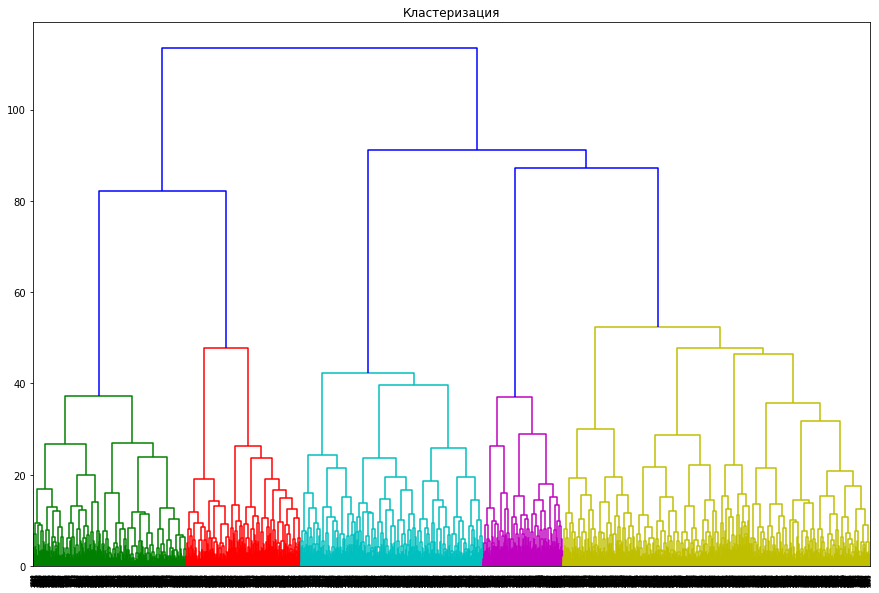

In [21]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация')
plt.show()

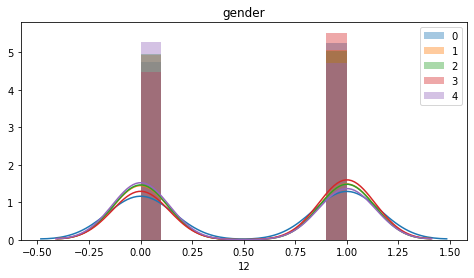

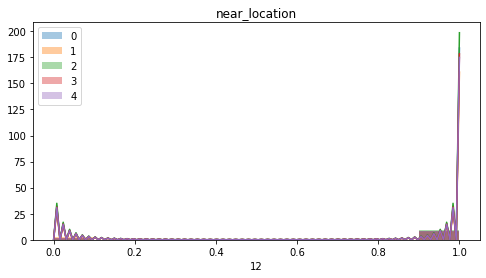

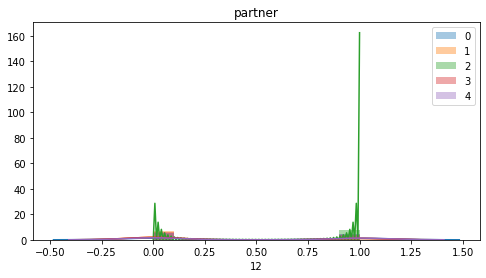

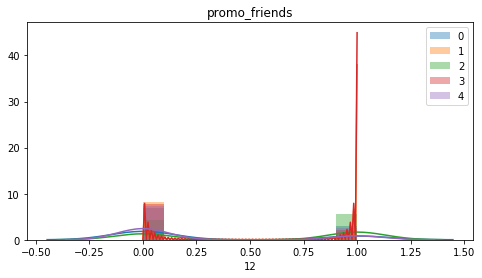

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


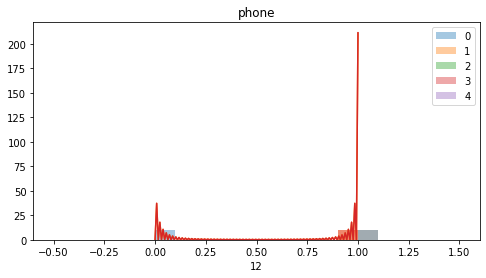

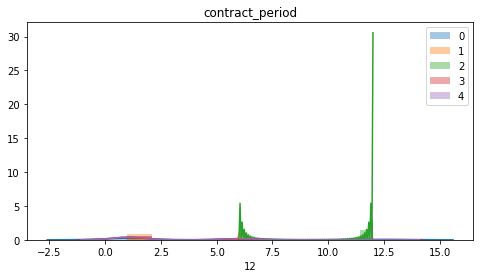

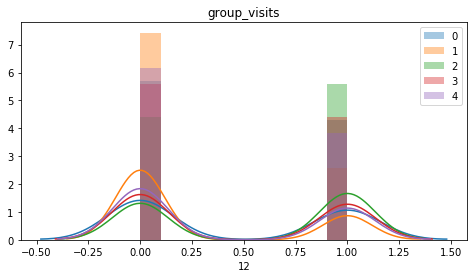

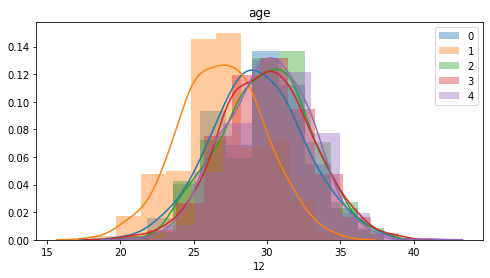

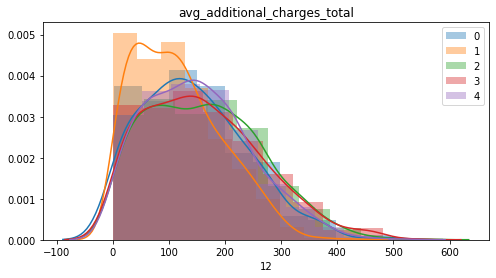

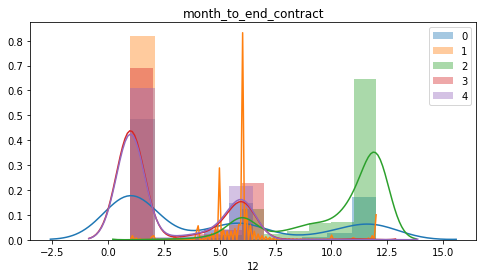

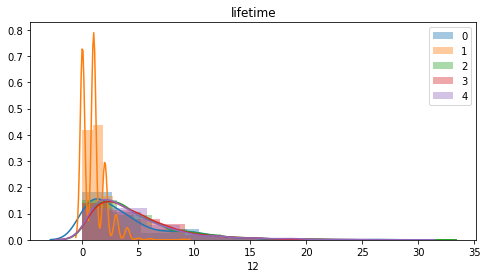

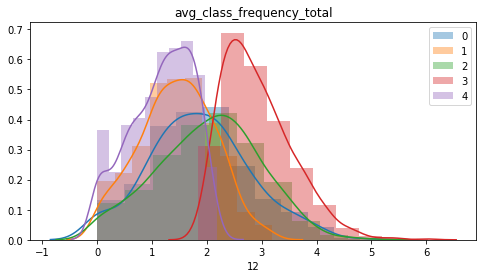

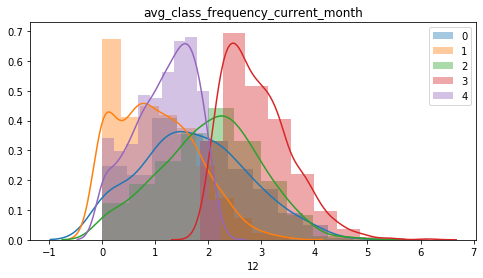

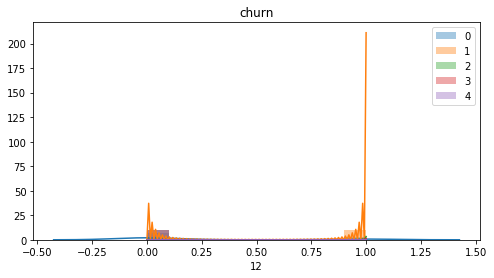

In [22]:
#распределение признаков по кластерам
for i in df.drop(columns = ['cluster']).columns:
    plt.figure(figsize=(8,4))
    for m in [0,1,2,3,4]:
        sns.distplot(df.loc[df['cluster'] == m][i], label = m, axlabel = 12, bins=10)    
    plt.title(i)
    plt.legend()
    plt.show()

In [23]:
#группировка по кластерам.среднее по оттоку
df.\
groupby('cluster').agg({'churn':['mean', 'count']}).\
reset_index().\
rename(columns = {'cluster': 'кластер', 'churn' : 'доля оттока'})

кластер доля оттока      
                 mean count
0       0    0.261780   382
1       1    0.997875   941
2       2    0.015625   960
3       3    0.007042   852
4       4    0.001156   865

In [24]:
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
2,0.503125,0.938542,0.767708,0.562500,1.000000,11.200000,0.559375,29.880208,162.783361,10.251042,4.718750,2.028887,2.023255,0.015625
3,0.552817,0.842723,0.369718,0.212441,0.998826,2.674883,0.440141,29.969484,160.701876,2.468310,4.613850,2.916013,2.923022,0.007042
4,0.472832,0.826590,0.455491,0.261272,1.000000,2.751445,0.382659,30.046243,151.641903,2.546821,4.634682,1.169503,1.168325,0.001156


Самый большой кластер оттока 1 - 99%. Затем 0 - 26%. И самые стабильные показатели - 2,3,4. 
- Характеристики 1 кластера:
1. 75% живут или работают в том же районе
2. 34% пришли от компании партнера
3. 18% привели друзья
4. 99% оставили номер телефона
5. чуть больше 1 месяц - длительность абонемента
6. 26% посещают групповые занятия
7. возраст 27 лет 
8. выручка от услуг - 115 
9. еще 1 месяц до окончания абонемента
10. менее 1 месяца - время обращения 
11. 1 раза в неделю посещают центр

- Характеристики 4 кластера

1. 82% живут или работают в том же районе
2. 45% пришли от компании партнера
3. 26% привели друзья
4. 100% оставили номер телефона
5. 3 месяца - длительность абонемента
6. 38% посещают групповые занятия
7. возраст 30 лет 
8. выручка от услуг - 151 
9. еще 2,5 месяца до окончания абонемента
10. менее 5 месяцев - время обращения 
11. 1 раз в неделю посещают центр

- Характеристики 2 кластера

1. 93% живут или работают в том же районе
2. 76% пришли от компании партнера
3. 56% привели друзья
4. 100% оставили номер телефона
5. 11 месяца - длительность абонемента
6. 55% посещают групповые занятия
7. возраст 29 лет 
8. выручка от услуг - 162 
9. еще 10  месяцев до окончания абонемента
10. менее 5 месяцев - время обращения 
11. 2 раза в неделю посещают центр

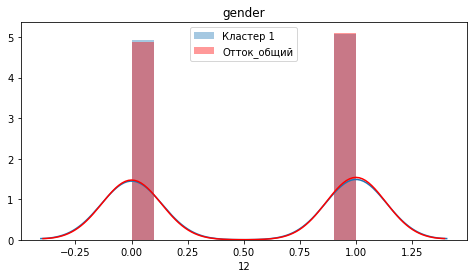

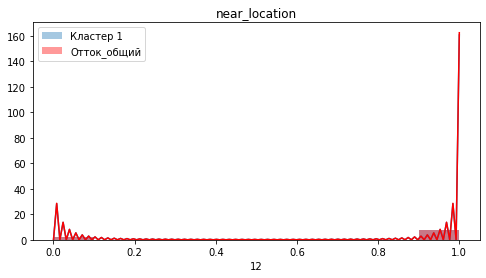

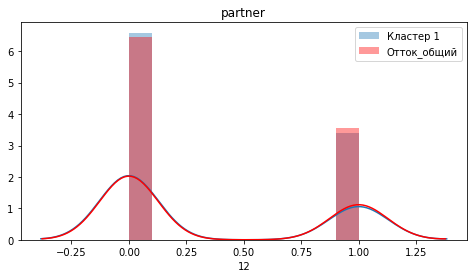

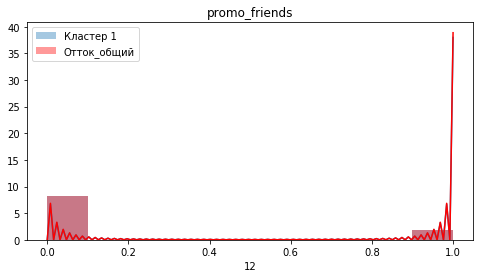

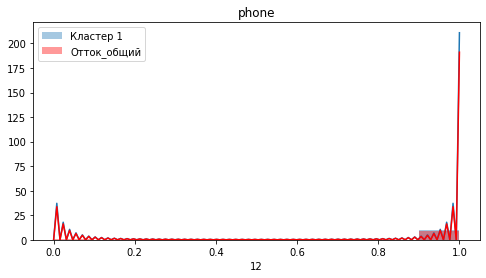

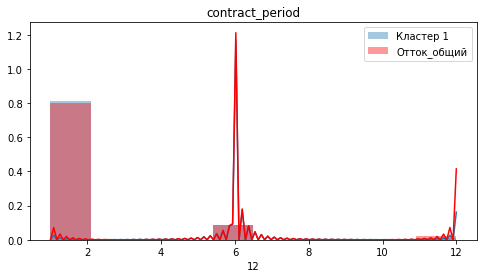

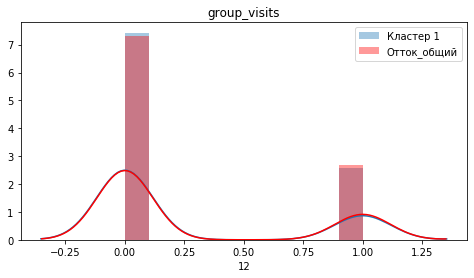

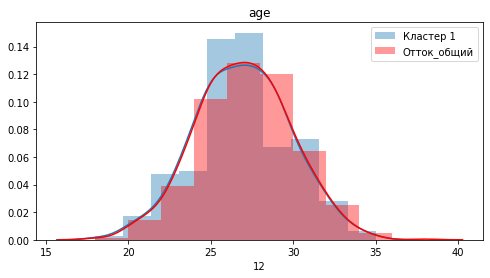

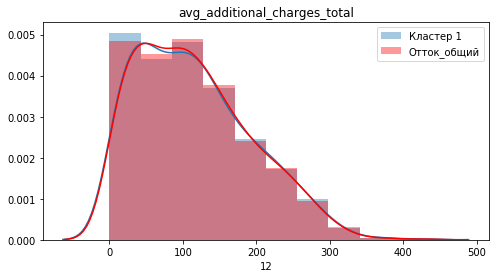

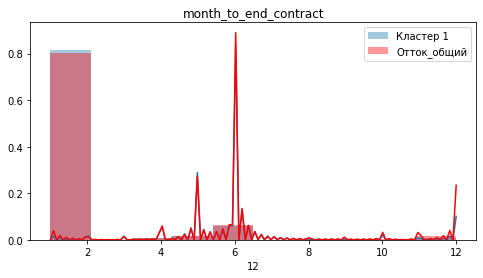

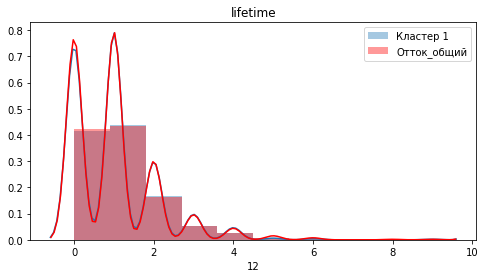

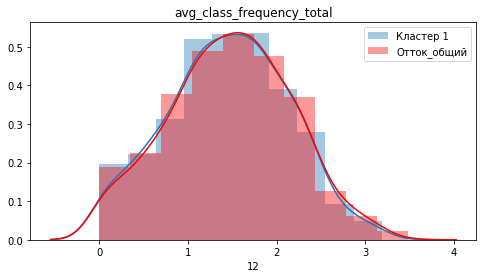

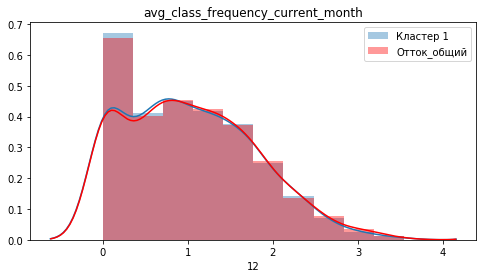

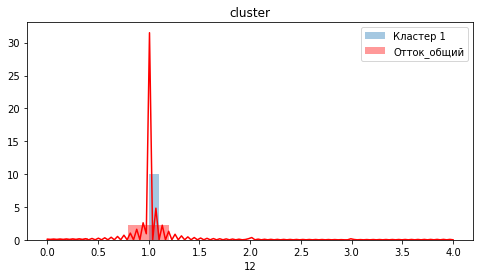

In [25]:
#цикл распределений 
for i in df.drop(columns = ['churn']).columns:
    plt.figure(figsize=(8,4))
    sns.distplot(df.query('cluster == 1')[i], label = 'Кластер 1', axlabel = 12, bins=10)
    sns.distplot(df.query('churn == 1')[i], label = 'Отток_общий', axlabel = 12, color="r", bins=10)
    plt.title(i)
    plt.legend()
    plt.show()

Показатели кластера 1 совпадают с общими показателями оттока. Кластеризация помогает выявить группы с риском уйти из фитнес-центра в следующем месяце. 

## Выводы <a id ='7'></a>

- Пришедшие от компаний-партнеров приобретают абонемент на 12 месяцев, посещают центр в среднем 2 раза в неделю и приобретают больше дополнительных услуг и половина из них ходят на групповые занятия. 

- Приобретающие абонемент на 1 месяц, приобретенные не по специальным акциям/программам, посещают центр 1 раз в неделю, редко посещающие групповые занятия и расходующие немного на дополнительные услуги уходят чаще. 
- Решение 1 - Продвигать абонементы через компании-партнеров.
- Решение 2 - Убрать из продуктовой линейки абонемент на месяц, оставить абонементы от 3 месяцев. 
- Решение 3 - Продвигать абонементы через друзей 